In [6]:
import numpy
from sklearn.cluster import KMeans

In [7]:
data = numpy.genfromtxt("../data/embed_sentence.csv", delimiter=',')
# remove header and key
data = data[1:,1:]
data

array([[-0.05324626,  0.03803693,  0.04466717, ...,  0.0455391 ,
         0.04776523,  0.07705509],
       [-0.01720252,  0.00692997, -0.07414566, ..., -0.05326527,
        -0.09291331,  0.05947024],
       [-0.00917412, -0.03315347,  0.00863482, ..., -0.03762561,
        -0.0439459 , -0.00172791],
       ...,
       [ 0.02548042, -0.00387622,  0.01017191, ..., -0.00746576,
         0.02338639, -0.00114984],
       [ 0.00078087,  0.00269756, -0.01980048, ..., -0.03095771,
         0.01404873, -0.03546168],
       [ 0.0129948 , -0.01418615,  0.07252683, ..., -0.01678526,
        -0.05187098,  0.0115465 ]])

In [8]:
wcss = []
for i in range(1, 100):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=2)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

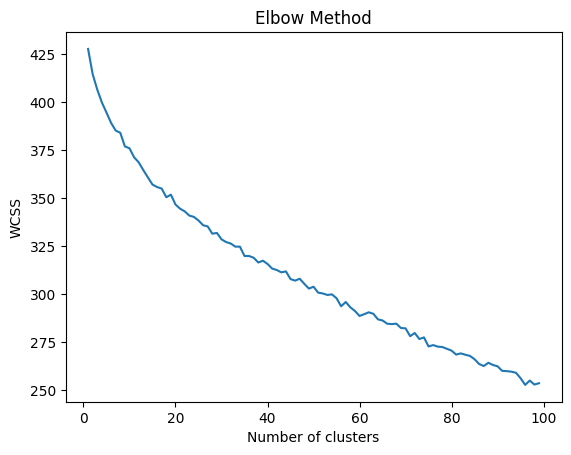

In [9]:
# Plot the Elbow method 
import matplotlib.pyplot as plt
plt.plot(range(1, len(wcss)+1), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.show()

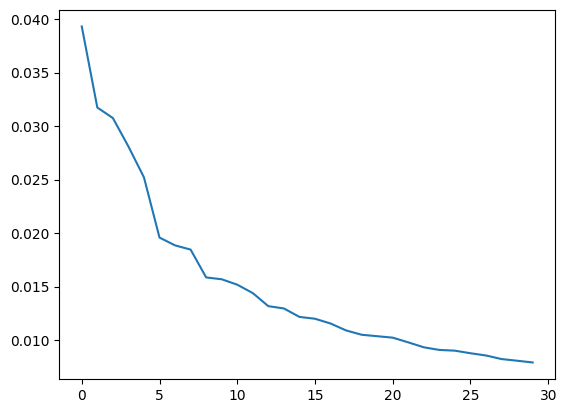

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.plot(PCA(30).fit(data).explained_variance_ratio_)

In [11]:
pca = PCA(n_components=100)
data_r = pca.fit(data).transform(data)

In [12]:
sum(pca.explained_variance_ratio_)


0.7765062033676973

/var/folders/11/g2cjsm2j5t36_244f2jycf2m0000gn/T/ipykernel_844/1170278953.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="best", shadow=False, scatterpoints=1)


Text(0.5, 1.0, 'PCA of Ramdam dataset')

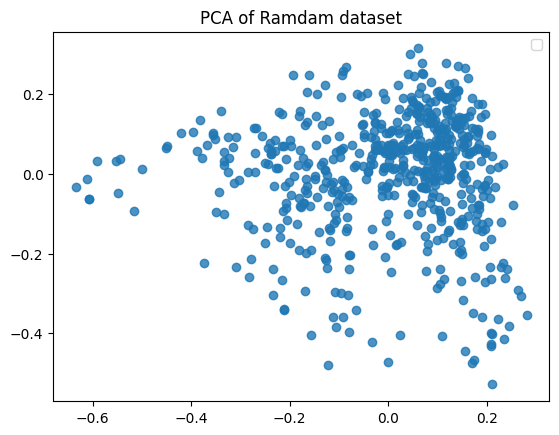

In [13]:
import matplotlib.pyplot as plt
plt.figure()
colors = ["navy", "turquoise", "darkorange"]
plt.scatter(data_r[:,0], data_r[:,1], alpha=0.8)
# plt.vlines(0.2, -5, 5)
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of Ramdam dataset")

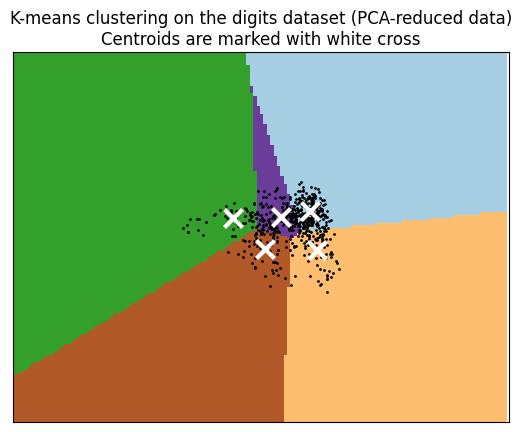

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init="k-means++", n_clusters=5, n_init=4)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), numpy.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(numpy.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [15]:
kmeans.cluster_centers_

array([[ 0.10980186,  0.09294464],
       [-0.34191649,  0.03895975],
       [ 0.14916912, -0.20852772],
       [-0.06219594,  0.04824023],
       [-0.1538444 , -0.19688917]])

In [16]:
# from sklearn import preprocessing
# data = preprocessing.normalize(data)

In [17]:
kmeans = KMeans(init="k-means++", n_clusters=20, random_state=29)
kmeans.fit(data)

KMeans(n_clusters=20, random_state=29)

In [21]:
numpy.save('vectors', kmeans.cluster_centers_)

In [19]:
kmeans.cluster_centers_

array([[ 0.05145166, -0.00408374,  0.00914713, ...,  0.01614814,
        -0.01798425,  0.02229675],
       [ 0.0464805 , -0.00517837, -0.01140191, ..., -0.02291246,
        -0.00443896,  0.01549781],
       [ 0.0156187 , -0.02241945,  0.00785098, ..., -0.0098859 ,
        -0.05717774,  0.01731035],
       ...,
       [-0.04804334, -0.01904632, -0.03322617, ...,  0.02883777,
         0.01562393, -0.04046856],
       [-0.03414708, -0.04749245,  0.00277089, ..., -0.01864943,
        -0.00350466,  0.01088189],
       [-0.04533831,  0.02898559,  0.06527094, ...,  0.02494744,
        -0.00814819, -0.02119641]])

In [23]:
import pandas
data_clean = pandas.read_csv('../data/data_clean.csv')
data_clean['kmeans'] = kmeans.predict(data)

In [25]:
data_clean.to_csv('../data/kmeans.csv')